In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


In [2]:
data = fetch_openml(name='credit-g', version=2, as_frame=True).frame    # Load dataset from OpenML as a Pandas Data Frame
data.head()    # prints the first 5 rows of the dataset

/home/codespace/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


<Axes: >

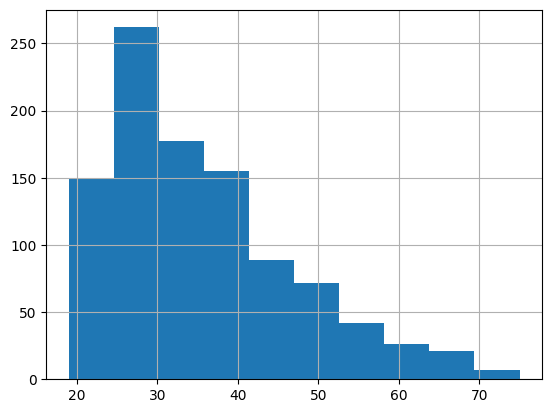

In [3]:
ages = data['age']

ages.hist()

In [4]:
# Implement your function here

def ReportMax(x):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset
        
    Returns
    -------
    argmax : positive integer betwen 1 and n
        The index of the argmax of the array x
    '''
    n = x.size
    
    # TO COMPLETE
    
    max_age = max(x) # Find the maximum age 
    print(max_age)

    argmax = 0

    for index, item in enumerate(x): # For loop to find the index of the maximum value
      if item == max_age:
        argmax = index

    return argmax

# Test your function here

max_age = ReportMax(ages)
print(max_age)

75
536


In [11]:
# Implement your function here

from numpy.random import laplace as lp

def ReportNoisyMax(x, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset

    eps : float (positive)
        epsilon budget for DP
        
    Returns
    -------
    argmax_lap : int (positive integer betwen 1 and n)
        An eps-DP private evaluation of the argmax
    '''    

    # TO COMPLETE

    # max_age = max(x) # Find the maximum age 

    argmax_lap = 0

    # for index, item in enumerate(x): # For loop to find the index of the maximum value
    #   if item == max_age:
    #     argmax_lap = index
    #print(f'array is:{x}')
    noisy_array = x+lp(1/eps,len(x))
    # noisy_array = []
    # for i in range(len(x)):
    #     noisy_array.append(x[i] + lp(0,1/eps))
    # print(f'noisy array: {noisy_array}')

    max_noisy = max(noisy_array)
    #print(f'max noisy: {max_noisy}')

    for i in range(noisy_array.size):
        if(max_noisy == noisy_array[i]):
            argmax_lap = i
            break
    
    # for index, item in enumerate(max_noisy):
    #     if item == max_noisy:
    #         argmax_lap = index
    #         break

    #print(argmax_lap)
    return argmax_lap

# Test your function here

eps = 0.1
ReportNoisyMax(ages, eps)

330

1000
1000
1000


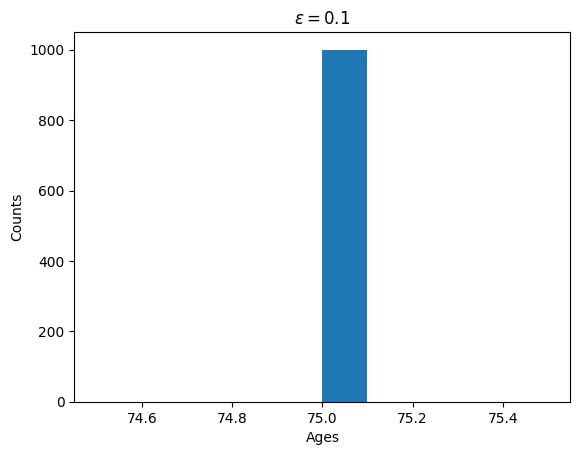

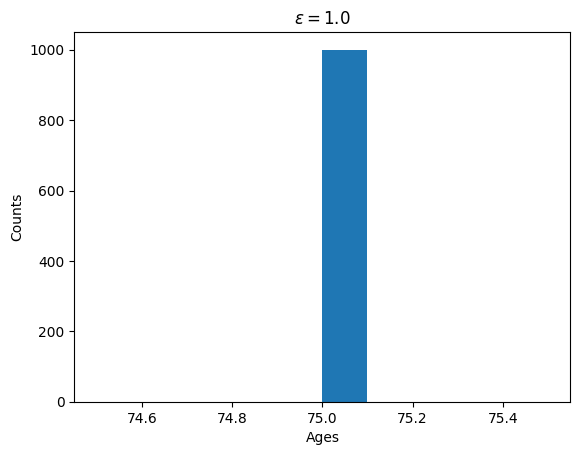

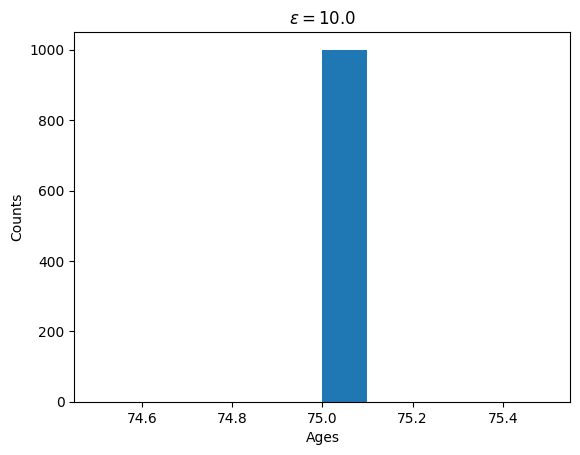

In [12]:
eps_arr = np.array([0.1, 1, 10])
num_iter = 1000
#print(ages)
for eps in eps_arr:

   # TO COMPLETE
  max_lp = [ReportNoisyMax(ages, eps) for i in range(num_iter)]
  #print(max_lp)
  
  #max_lp_rounded = (np.rint(max_lp)).astype(int)  
  #print(max_lp_rounded)
  max_lp_age = []
  array_len = len(max_lp)
  print(array_len)
  for i in range(array_len):
   index_of_age = max_lp[i]
   max_lp_age.append(ages[index_of_age])
#   for i in range(max_lp_rounded.size):
#    index_of_ages = max_lp_rounded[i]
#    max_lp_age.append(ages[index_of_ages])


  #print(max_lp_age)
  
  plt.figure()
  plt.hist(max_lp_age)
  plt.title(r'$\epsilon = {}$'.format(eps))
  plt.xlabel('Ages')
  plt.ylabel('Counts')

[536. 536. 536. 536. 536. 536. 536. 536. 536. 536. 536. 536. 536. 536.
 536. 536. 536. 536. 536. 536.]
[0.1        0.14736842 0.19473684 0.24210526 0.28947368 0.33684211
 0.38421053 0.43157895 0.47894737 0.52631579 0.57368421 0.62105263
 0.66842105 0.71578947 0.76315789 0.81052632 0.85789474 0.90526316
 0.95263158 1.        ]
[75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75]
[75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75

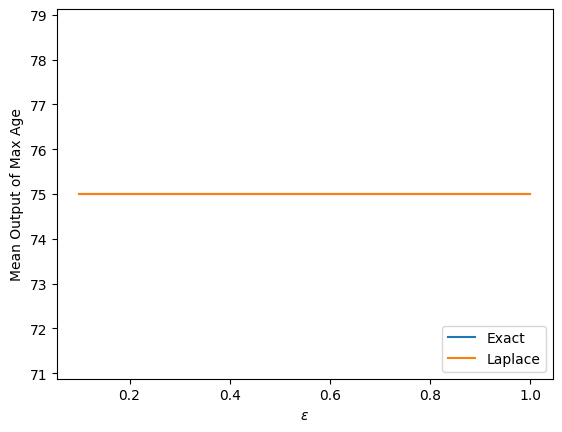

In [13]:
num_iter = 100                           # array of epsilons
eps_arr = np.linspace(0.1, 1.0, num=20)      # number of iterations for each epsilon

# TO COMPLETE

noisy_max_mean = np.zeros_like(eps_arr)      # array of the mean noisy maximum ages returned by ReportNoisyMax. Intialized to all zeros
noisy_max_std = np.zeros_like(eps_arr)       # array to store the standard deviations of the noisy maximum ages

exact_max = max_age*np.ones_like(eps_arr)    # array where each entry is equal to the exact maximum age
print(exact_max)

exact_max_age = ages[exact_max]
#print(exact_max_age)

print(eps_arr)
for i, eps in enumerate(eps_arr):

  # TO COMPLETE
  max_lp = [ReportNoisyMax(ages, eps) for y in range (num_iter)]
  max_lp_rounded = (np.rint(max_lp)).astype(int)  
  #print(max_lp_rounded)

  max_lp_age = []
  for z in range(max_lp_rounded.size):
   index_of_ages = max_lp_rounded[z]
   max_lp_age.append(ages[index_of_ages])
  print(max_lp_age)
  noisy_max_mean[i] = np.mean(max_lp_age)
  noisy_max_std[i] = np.std(max_lp_age)
  pass
    
print(noisy_max_mean)
fig = plt.figure()
plt.plot(eps_arr, exact_max_age, label='Exact')
plt.plot(eps_arr, noisy_max_mean, label='Laplace')
plt.fill_between(eps_arr, noisy_max_mean - noisy_max_std, noisy_max_mean + noisy_max_std, alpha = 0.2)
plt.legend(loc="lower right")
plt.xlabel("$\epsilon$")
plt.ylabel("Mean Output of Max Age")
plt.show()